In [1]:
import numpy as np
import pandas as pd


df = pd.read_csv('spam.csv', encoding='ANSI')
df.to_csv('spam.csv', encoding='utf-8', index=False)

In [2]:
df.sample(7)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1643,ham,U WILL SWITCH YOUR FONE ON DAMMIT!!,NaN,NaN,NaN
3080,ham,Have a great trip to India. And bring the ligh...,NaN,NaN,NaN
2245,ham,How did you find out in a way that didn't incl...,NaN,NaN,NaN
211,ham,Home so we can always chat,NaN,NaN,NaN
3980,ham,Huh i cant thk of more oredi how many pages do...,NaN,NaN,NaN
5259,ham,Can help u swoop by picking u up from wherever...,NaN,NaN,NaN
4714,ham,S:)8 min to go for lunch:),NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


1.Data cleaning


In [5]:
#drop columns 3,4,5
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace =True)

In [6]:
df.sample(5)

,v1,v2
4799,ham,its cool but tyler had to take off so we're go...
4332,ham,Y bishan lei... I tot ÃƒÆ’Ã†â€™Ãƒâ€ Ã¢â‚¬â„¢Ãƒ...
4709,ham,Ya i knw u vl giv..its ok thanks kano..anyway ...
5160,ham,Ok... Then r we meeting later?
3377,ham,Hows that watch resizing


In [7]:
#renaming the cols
df.rename(columns={'v1':'targets','v2':'text'},inplace=True)
df.sample(7)

,targets,text
3638,ham,Wat's da model num of ur phone?
3393,ham,Bull. Your plan was to go floating off to IKEA...
3847,ham,Can you plz tell me the ans. BSLVYL sent via f...
285,ham,"K, I might come by tonight then if my class le..."
2554,ham,I'll reach in ard 20 mins ok...
1972,ham,Yes but can we meet in town cos will go to gep...
2114,spam,Sunshine Hols. To claim ur med holiday send a ...


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['targets'] =  encoder.fit_transform(df['targets'])

In [10]:
df.head()
#spams as 1 and hams as 0

,targets,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#check for the null values
df.isnull().sum()

targets    0
text       0
dtype: int64

In [12]:
#check for duplicate values
df.duplicated().sum()


403

In [13]:
#remove duplicates
df = df.drop_duplicates(keep='first')

In [14]:
df.duplicated().sum()


0

In [15]:
df.shape

(5169, 2)

2.EDA

In [16]:
df['targets'].value_counts()

0    4516
1     653
Name: targets, dtype: int64

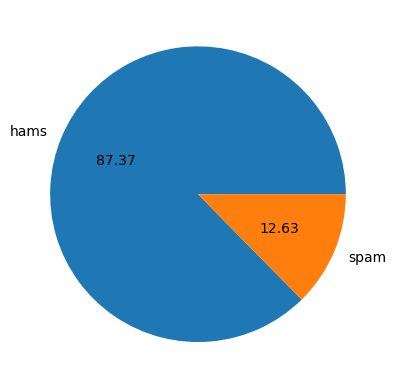

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['targets'].value_counts(),labels=['hams','spam'],autopct="%0.2f")
plt.show()

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91946\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df['num_characters'] = df['text'].apply(len)
#new column is added

In [20]:
df.head()

,targets,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
#adding a new column containing a count of number of words

In [22]:
df.head()

,targets,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
df['num_sents'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
#adding a new column containing a count of number of sentences

In [24]:
df.head()

,targets,text,num_characters,num_words,num_sents
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[['num_characters','num_words','num_sents']].describe()

,num_characters,num_words,num_sents
count,5169.000000,5169.000000,5169.000000
mean,322.012575,45.708648,1.966531
std,986.372593,111.862920,1.449833
min,2.000000,1.000000,1.000000
25%,37.000000,9.000000,1.000000
50%,63.000000,15.000000,1.000000
75%,132.000000,29.000000,2.000000
max,18240.000000,2070.000000,38.000000


In [26]:
#ham messages
df[df['targets']==0][['num_characters','num_words','num_sents']].describe()

,num_characters,num_words,num_sents
count,4516.000000,4516.000000,4516.000000
mean,217.783658,33.652126,1.820195
std,853.399320,96.943089,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,9.000000,1.000000
50%,54.000000,14.000000,1.000000
75%,101.000000,24.000000,2.000000
max,18240.000000,2070.000000,38.000000


In [27]:
#description for spam messages
df[df['targets']==1][['num_characters','num_words','num_sents']].describe()

,num_characters,num_words,num_sents
count,653.000000,653.000000,653.000000
mean,1042.836141,129.088821,2.978560
std,1439.754007,161.666621,1.493185
min,13.000000,2.000000,1.000000
25%,137.000000,27.000000,2.000000
50%,156.000000,32.000000,3.000000
75%,2269.000000,266.000000,4.000000
max,10652.000000,1206.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

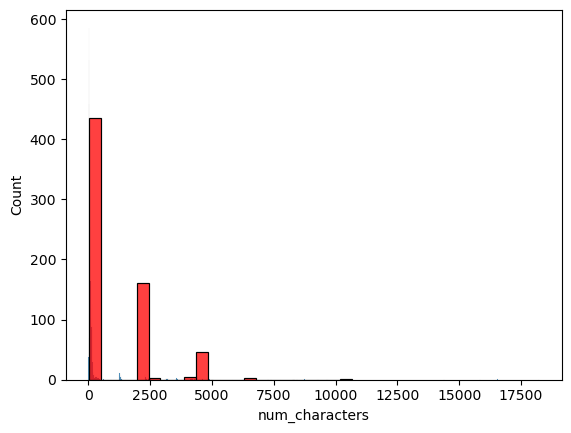

In [28]:
import seaborn as sns
sns.histplot(df[df['targets']== 0]['num_characters'])
sns.histplot(df[df['targets']== 1]['num_characters'],color='red')


<Axes: xlabel='num_words', ylabel='Count'>

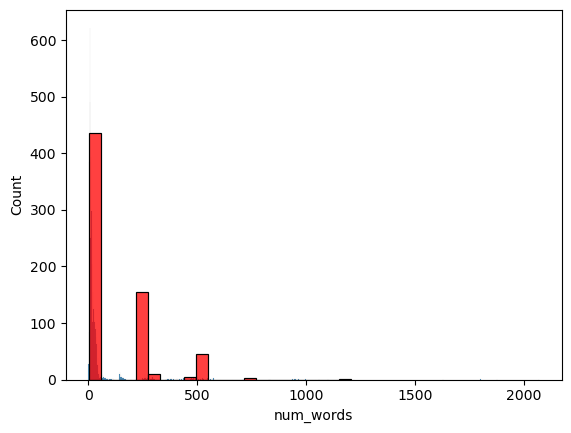

In [29]:
import seaborn as sns
sns.histplot(df[df['targets']== 0]['num_words'])
sns.histplot(df[df['targets']== 1]['num_words'],color='red')


<Axes: xlabel='num_sents', ylabel='Count'>

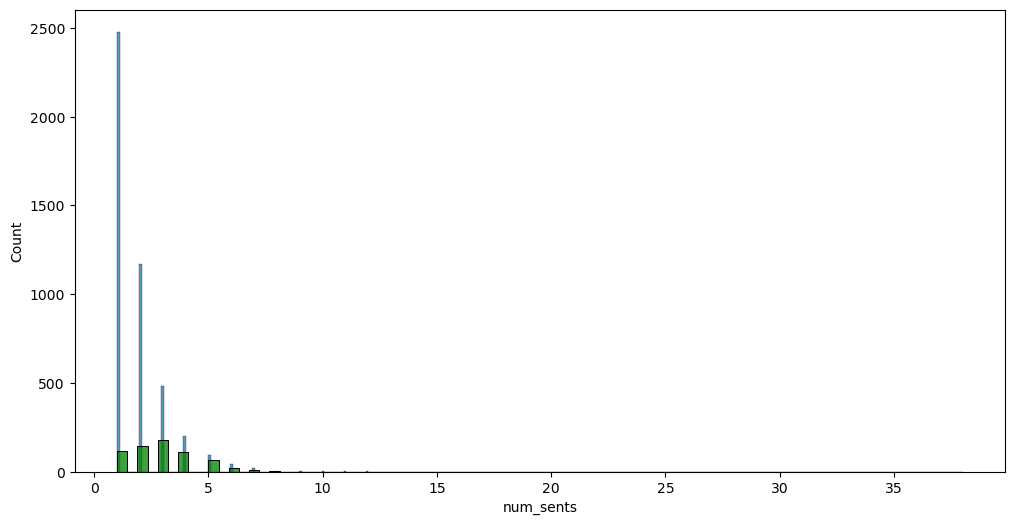

In [30]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['targets']== 0]['num_sents'])
sns.histplot(df[df['targets']== 1]['num_sents'],color='green')


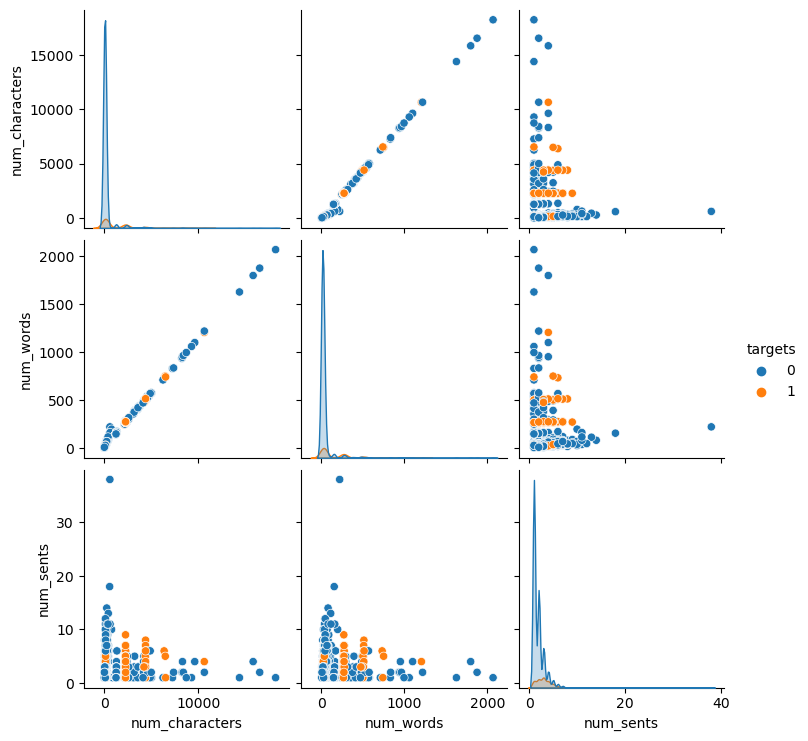

In [31]:
sns.pairplot(df,hue='targets')

In [32]:
df.corr()

C:\Users\91946\AppData\Local\Temp\ipykernel_13108\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,targets,num_characters,num_words,num_sents
targets,1.000000,0.277913,0.283464,0.265459
num_characters,0.277913,1.000000,0.997947,0.122012
num_words,0.283464,0.997947,1.000000,0.165203
num_sents,0.265459,0.122012,0.165203,1.000000


sns.heatmap(df.corr(),annot=True)

3.DATA PREPROCESSING
. tokenization
. lowercase
. Removing special charaters
. Removing stop words and punctuation
. Stemming

In [33]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords as stw
stw.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91946\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [36]:


def text_transform(text):
    text = text.lower()  # lowercase
    text = nltk.word_tokenize(text) #tokenize
    y = []
    
    for i in text:  
        if i.isalnum(): #Removing special charaters
            y.append(i)
    text = y[:]
    y.clear();
    
    for i in text:
        if i not in stw.words('english') and i not in string.punctuation:  #Removing stop words and punctuation
            y.append(i);
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))  #stemming
    
    return " ".join(y)
       
    
   
        
text_transform("Hey! Yashant are you dancing since 4 hours? ")

'hey yashant danc sinc 4 hour'

In [35]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [37]:
df['text_transform']=df['text'].apply(text_transform)

In [38]:
df.head()

,targets,text,num_characters,num_words,num_sents,text_transform
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
pip install wordcloud


In [40]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [41]:
spam_wc = wc.generate(df[df['targets'] == 1]['text_transform'].str.cat(sep=" "))

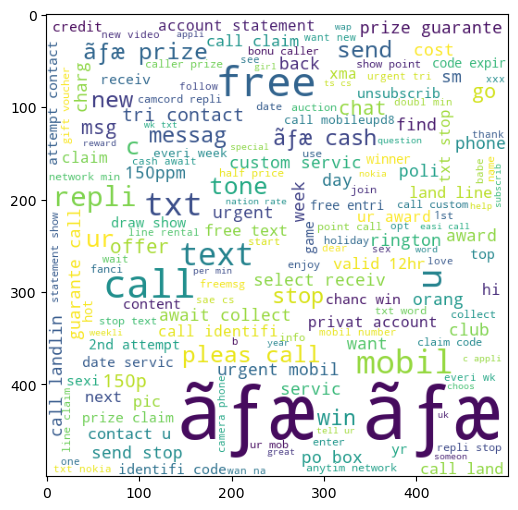

In [42]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [43]:
ham_wc = wc.generate(df[df['targets'] == 0]['text_transform'].str.cat(sep=" "))

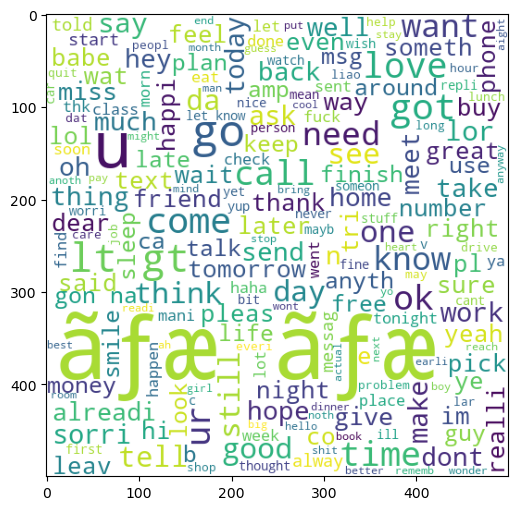

In [44]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [45]:
df.head()

,targets,text,num_characters,num_words,num_sents,text_transform
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
spam_corpus = []
for msg in df[df['targets'] == 1]['text_transform'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [47]:
len(spam_corpus)

12147

4.DataModelling

In [48]:
#using bag of words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [49]:
X = cv.fit_transform(df['text_transform']).toarray()

In [50]:
X.shape

(5169, 6717)

In [51]:
y = df['targets'].values

In [52]:
y


array([0, 0, 1, ..., 0, 0, 0])

In [53]:
from sklearn.model_selection import train_test_split


In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [55]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [56]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [57]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8781431334622823
[[790 106]
 [ 20 118]]
0.5267857142857143


In [58]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.965183752417795
[[871  25]
 [ 11 127]]
0.8355263157894737


In [59]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [60]:
#using tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [61]:
X = tfidf.fit_transform(df['text_transform']).toarray()

In [62]:
X.shape

(5169, 3000)

In [63]:
y = df['targets'].values

In [64]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [67]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [68]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [69]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8704061895551257
[[789 107]
 [ 27 111]]
0.5091743119266054


In [70]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9661508704061895
[[896   0]
 [ 35 103]]
1.0


In [71]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9854932301740812
[[895   1]
 [ 14 124]]
0.992


In [72]:
#tfidf -> MNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [92]:
pip install xgboost 

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/75/dd/9afe0d9d0f61a5384c3932626a022e38c396a5d88e6f5345ad2f7b576747/xgboost-1.7.6-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/70.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/70.9 MB 403.5 kB/s eta 0:02:56
   ---------------------------------------- 0.1/70.9 MB 403.5 kB/s eta 0:02:56
   ---------------------------------------- 0.1/70.9 MB 403.5 kB/s eta 0:02:56
   ---------------------------------------- 0.1/70.9 MB 403.5 kB/s eta 0:02:56
   ---------------------------------------- 0.2/70.9 MB 378.3 kB/s eta 0:03:08
   ---------------------------------------- 0.2/70

In [73]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [74]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb,   
    'RF': rfc, 
    'ETC': etc,
}

In [75]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [76]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9700193423597679
Precision -  0.928
For  KN
Accuracy -  0.9110251450676983
Precision -  1.0
For  NB
Accuracy -  0.9661508704061895
Precision -  1.0
For  RF
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  ETC
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


In [77]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.911025,1.000000
2,NB,0.966151,1.000000
4,ETC,0.975822,0.982906
3,RF,0.972921,0.982456
0,SVC,0.970019,0.928000


In [78]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.911025
1,NB,Accuracy,0.966151
2,ETC,Accuracy,0.975822
3,RF,Accuracy,0.972921
4,SVC,Accuracy,0.970019
5,KN,Precision,1.000000
6,NB,Precision,1.000000
7,ETC,Precision,0.982906
8,RF,Precision,0.982456
9,SVC,Precision,0.928000


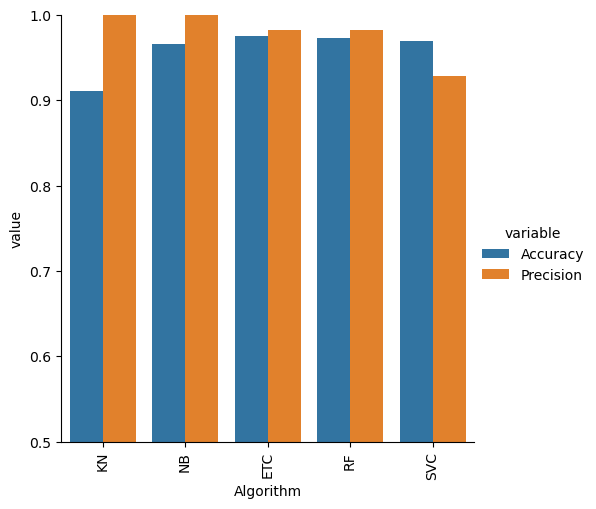

In [79]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [80]:
# model improve
# 1. Change the max_features parameter of TfIdf


In [81]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [82]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.911025,1.000000,0.911025,1.000000,0.911025,1.000000,0.911025,1.000000
1,NB,0.966151,1.000000,0.966151,1.000000,0.966151,1.000000,0.966151,1.000000
2,ETC,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,RF,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
4,SVC,0.970019,0.928000,0.970019,0.928000,0.970019,0.928000,0.970019,0.928000


In [83]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df_scaled = new_df.merge(temp_df,on='Algorithm')
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_num_chars_x,Precision_num_chars_x,Accuracy_num_chars_y,Precision_num_chars_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.911025,1.000000,0.911025,1.000000,0.911025,1.000000,0.911025,1.000000
1,NB,0.966151,1.000000,0.966151,1.000000,0.966151,1.000000,0.966151,1.000000
2,ETC,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,RF,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
4,SVC,0.970019,0.928000,0.970019,0.928000,0.970019,0.928000,0.970019,0.928000


In [84]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_num_chars_x,Precision_num_chars_x,Accuracy_num_chars_y,Precision_num_chars_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.911025,1.000000,0.911025,1.000000,0.911025,1.000000,0.911025,1.000000
1,NB,0.966151,1.000000,0.966151,1.000000,0.966151,1.000000,0.966151,1.000000
2,ETC,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,RF,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456,0.972921,0.982456
4,SVC,0.970019,0.928000,0.970019,0.928000,0.970019,0.928000,0.970019,0.928000


In [85]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier


In [86]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [87]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [88]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.97678916827853
Precision 0.9830508474576272


In [89]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [90]:
from sklearn.ensemble import StackingClassifier

In [91]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [92]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred)) 

Accuracy 0.97678916827853
Precision 0.9130434782608695


In [93]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))